## Intro
Video Link: https://www.youtube.com/watch?v=KNAWp2S3w94

In [1]:
# https://www.youtube.com/watch?v=KNAWp2S3w94

import tensorflow as tf
import numpy as np

2023-03-01 01:47:39.475618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
])

2023-03-01 01:47:43.766332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(
    optimizer="sgd",
    loss="mean_squared_error",
)

In [5]:
x = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
y = np.array([-3, -1, 1, 3, 5, 7], dtype=float)

print(x)
print(y)

[-1.  0.  1.  2.  3.  4.]
[-3. -1.  1.  3.  5.  7.]


In [6]:
model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 303ms/step - loss: 23.0779
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 18.4379
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 14.7815
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8993
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.6261
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8322
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 6.4156
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 5.2958
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 4.4098
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7076
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 3.1504
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 2.7071
Epoch 13/100
1/1 [==============================] - 0s 

In [7]:
model.predict([10.0])

1/1 [==============================] - 0s 81ms/step


array([[17.738108]], dtype=float32)

## Fashion MNIST
Video Link: https://youtu.be/bemDFpNooA8

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.4075 - accuracy: 0.6923
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6447 - accuracy: 0.7604
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5427 - accuracy: 0.8094
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5196 - accuracy: 0.8163
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5111 - accuracy: 0.8217


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.8182
Test Loss: 0.5594, Test Accuracy: 0.8182


In [16]:
sample_image = train_images[0]

pred = model.predict(train_images[0].reshape(1, 28, 28))

print(f"Prediction Result: {np.argmax(pred)}")
print(f"Answer: {train_labels[0]}")

1/1 [==============================] - 0s 43ms/step
Prediction Result: 9
Answer: 9


## Convolutional Neural Network (CNN)

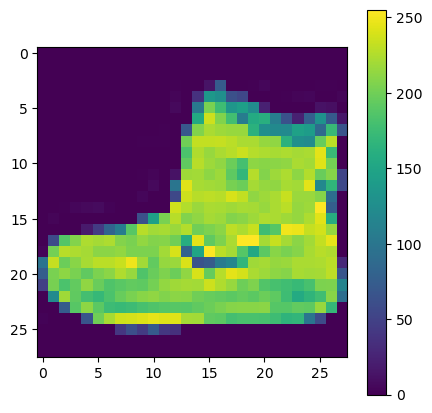

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(sample_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])


In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [29]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [30]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 33s 35ms/step - loss: 0.7093 - accuracy: 0.7753
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.4257 - accuracy: 0.8433
Epoch 3/5
938/938 [==============================] - 35s 37ms/step - loss: 0.3762 - accuracy: 0.8601
Epoch 4/5
938/938 [==============================] - 34s 36ms/step - loss: 0.3423 - accuracy: 0.8738
Epoch 5/5
938/938 [==============================] - 36s 38ms/step - loss: 0.3236 - accuracy: 0.8787


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.3133 - accuracy: 0.8836
Test Loss: 0.3133, Test Accuracy: 0.8836


In [ ]:
sample_image = train_images[0]

pred = model.predict(train_images[0].reshape(1, 28, 28))

print(f"Prediction Result: {np.argmax(pred)}")
print(f"Answer: {train_labels[0]}")

1/1 [==============================] - 0s 67ms/step
Prediction Result: 9
Answer: 9


## Tensorboard 사용

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from datetime import datetime

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

model = MyModel()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a function for creating a TensorBoard callback
def create_tensorboard_callback():
    logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    return tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model with the TensorBoard callback
tensorboard_callback = create_tensorboard_callback()
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test), callbacks=[tensorboard_callback])


Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1386 - accuracy: 0.9578 - val_loss: 0.0562 - val_accuracy: 0.9820
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0432 - accuracy: 0.9860 - val_loss: 0.0502 - val_accuracy: 0.9823
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0554 - val_accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0695 - val_accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0674 - val_accuracy: 0.9821


In [52]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.
